In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("D:/Data Science Projects/Player Performance Prediction/data/processed/players_cleaned.csv")
df.shape
df.head()


,short_name,age,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,33,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,93,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,Cristiano Ronaldo,35,187,83,Portugal,Juventus,Italian Serie A,1.0,92,92,...,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,J. Oblak,27,188,87,Slovenia,Atlético Madrid,Spain Primera Division,1.0,91,93,...,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,R. Lewandowski,31,184,80,Poland,FC Bayern München,German 1. Bundesliga,1.0,91,91,...,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,Neymar Jr,28,175,68,Brazil,Paris Saint-Germain,French Ligue 1,1.0,91,91,...,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3


C:\Users\himan\AppData\Local\Temp\ipykernel_27564\2901105496.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation.values, y=correlation.index, palette='coolwarm')


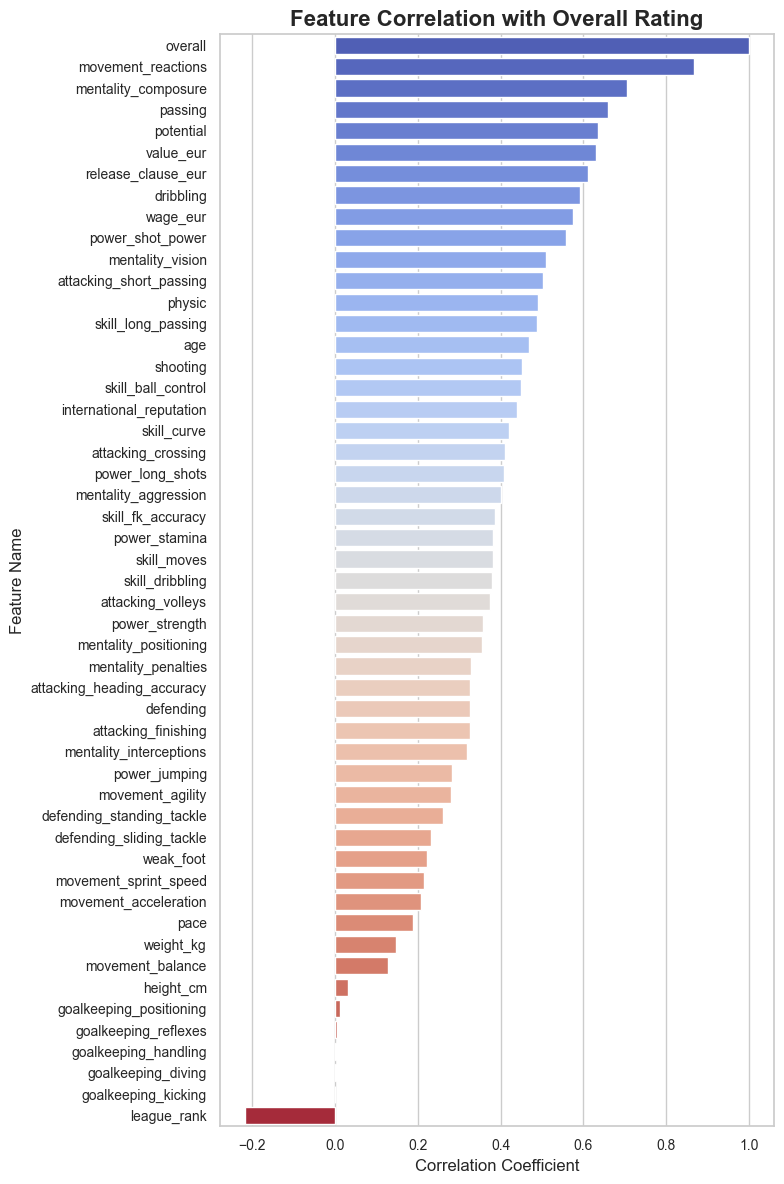

In [27]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlations
correlation = df.corr(numeric_only=True)['overall'].sort_values(ascending=False)

# Set plot style
sns.set(style='whitegrid')
plt.figure(figsize=(8, 12))
sns.barplot(x=correlation.values, y=correlation.index, palette='coolwarm')

# Titles and labels
plt.title('Feature Correlation with Overall Rating', fontsize=16, weight='bold')
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Feature Name', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()



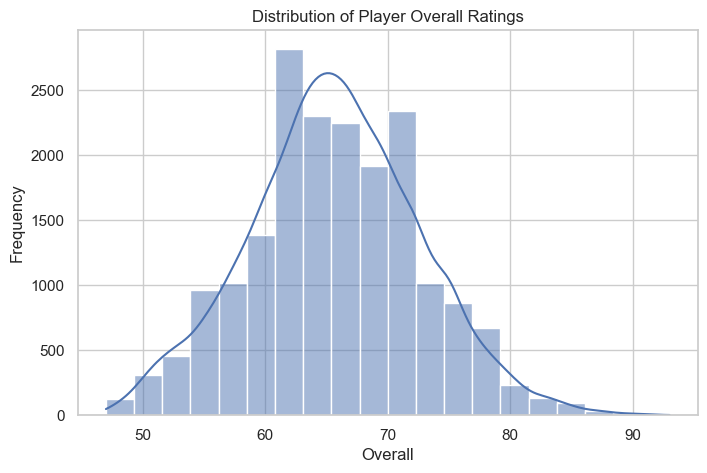

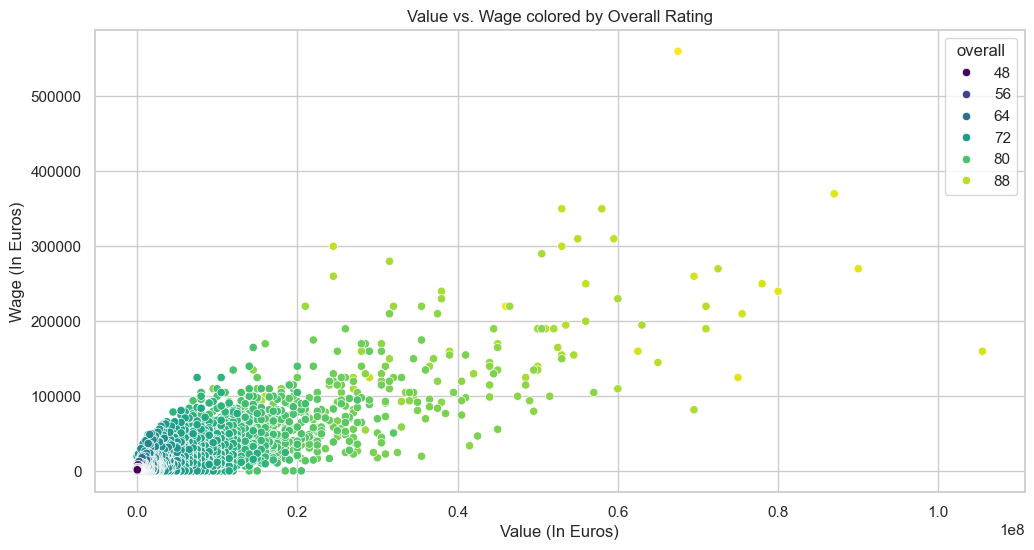

In [31]:
# Distribution of target
plt.figure(figsize=(8,5))
sns.histplot(df['overall'], kde=True, bins=20)
plt.title('Distribution of Player Overall Ratings')
plt.xlabel('Overall')
plt.ylabel('Frequency')
plt.show()


# Example: Wage vs. Value
sns.scatterplot(data=df, x='value_eur', y='wage_eur', hue='overall', palette='viridis')
plt.title('Value vs. Wage colored by Overall Rating')
plt.xlabel('Value (In Euros)')
plt.ylabel('Wage (In Euros)')
plt.show()


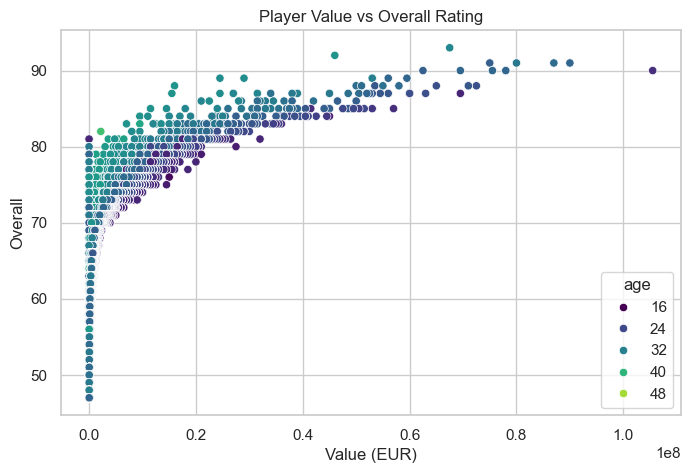

In [32]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='value_eur', y='overall', hue='age', palette='viridis')
plt.title('Player Value vs Overall Rating')
plt.xlabel('Value (EUR)')
plt.ylabel('Overall')
plt.show()


C:\Users\himan\AppData\Local\Temp\ipykernel_27564\2664655495.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='player_positions', y='overall', data=subset, palette='Spectral')


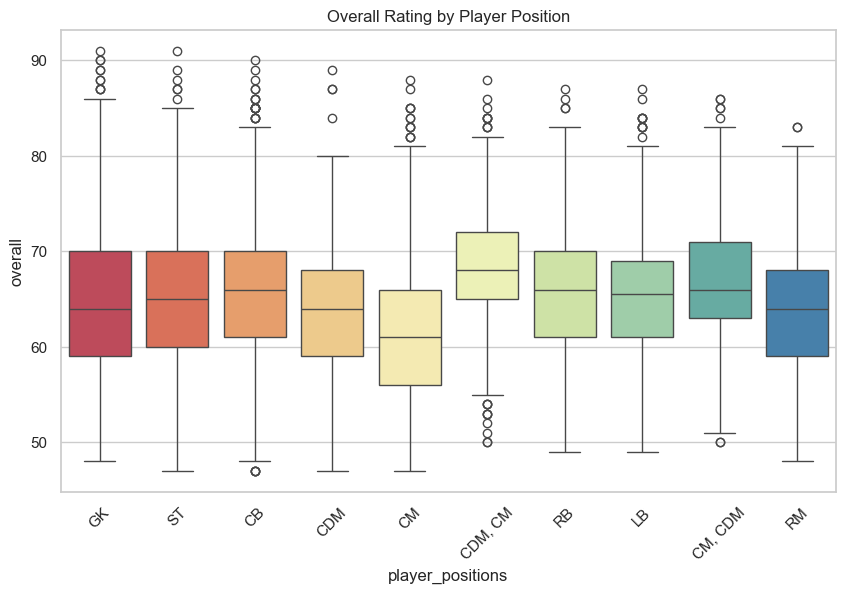

In [33]:
top_positions = df['player_positions'].value_counts().nlargest(10).index
subset = df[df['player_positions'].isin(top_positions)]

plt.figure(figsize=(10, 6))
sns.boxplot(x='player_positions', y='overall', data=subset, palette='Spectral')
plt.xticks(rotation=45)
plt.title('Overall Rating by Player Position')
plt.show()


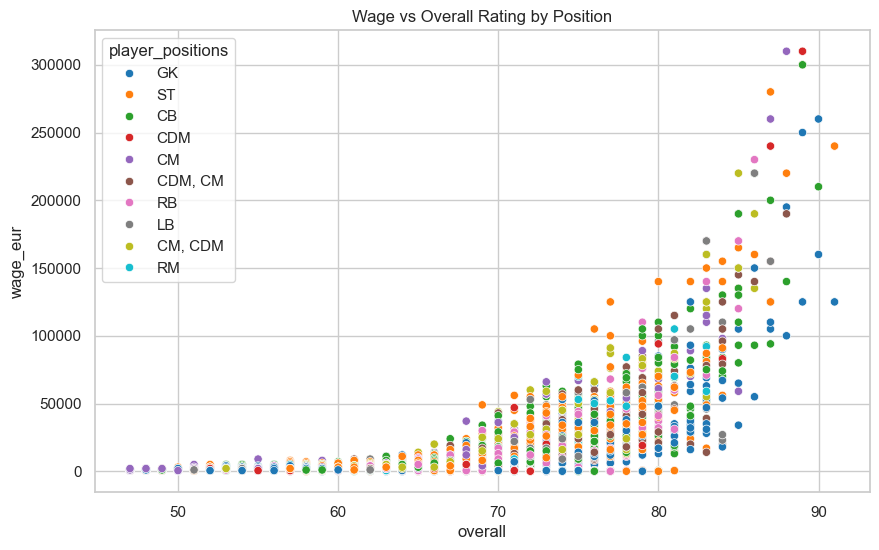

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=subset, x='overall', y='wage_eur', hue='player_positions', palette='tab10')
plt.title('Wage vs Overall Rating by Position')
plt.show()


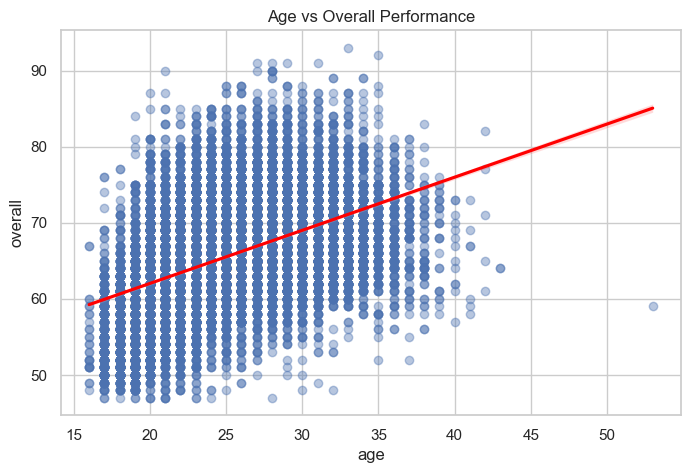

In [35]:
plt.figure(figsize=(8, 5))
sns.regplot(data=df, x='age', y='overall', scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
plt.title('Age vs Overall Performance')
plt.show()


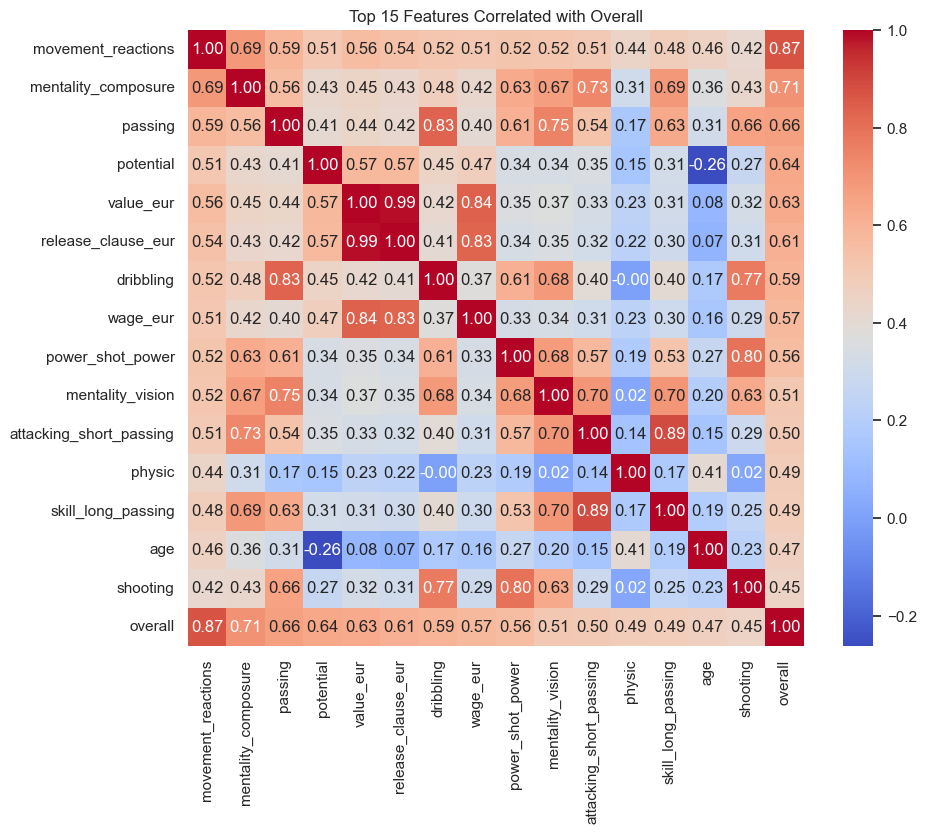

In [40]:
# Select top 15 correlations (excluding overall itself)
top_corr = df.corr(numeric_only=True)['overall'].abs().sort_values(ascending=False)[1:16]
top_features = top_corr.index.tolist()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[top_features + ['overall']].corr(), annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Top 15 Features Correlated with Overall')
plt.show()



In [42]:
# Optional: for use in feature engineering
df.to_csv("D:/Data Science Projects/Player Performance Prediction/data/processed/players_ready.csv", index=False)
